<a href="https://colab.research.google.com/github/viveksharma-niet/TreeModelUpgrad/blob/main/AdaBoostClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [89]:
data = pd.read_csv('https://raw.githubusercontent.com/viveksharma-niet/TreeModelUpgrad/refs/heads/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [91]:
data.columns[data.isnull().any()].values

array([], dtype=object)

In [92]:
y = data['Attrition']
X = data.drop('Attrition', axis=1)

In [93]:
int_data = X.select_dtypes(include=['int64'])
cat_data =  X.select_dtypes(include=['object'])

In [94]:
print(X.shape)
print(int_data.shape)
print(cat_data.shape)

(1470, 34)
(1470, 26)
(1470, 8)


In [95]:
y.value_counts()

,count
Attrition,
No,1233
Yes,237


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

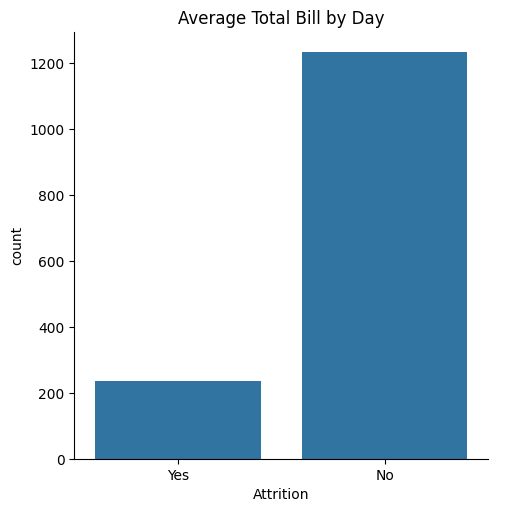

In [97]:
sns.catplot(data=y.to_frame().reset_index(), x="Attrition", kind="count")
plt.title("Average Total Bill by Day")
plt.show()

In [98]:
y = y.map({'Yes':1, 'No':0})


In [99]:
y.value_counts()

,count
Attrition,
0,1233
1,237


Covert Categorial to Dummy

In [100]:
dummy_data = pd.get_dummies(cat_data, dtype='int')


In [101]:
dummy_data.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [102]:
from sklearn.preprocessing import StandardScaler

Scaling the numerical values

In [103]:
int_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [104]:
standardScaler = StandardScaler()
transformed_data = standardScaler.fit_transform(int_data)

In [105]:
transformed_data = pd.DataFrame(transformed_data, columns=int_data.columns)

In [106]:
transformed_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,...,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.504377e-17,5.075305e-17,4.350262e-17,7.008755e-17,0.0,-1.546760e-16,1.305078e-16,1.691768e-16,6.525392e-17,-2.658493e-17,...,9.667248e-17,0.0,6.767074e-17,-1.208406e-18,8.700523e-17,-6.042030e-18,-3.021015e-17,9.063045e-17,1.208406e-18,-2.779334e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,0.0,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,...,1.000340e+00,0.0,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,-1.736576e+00,-1.010909e+00,-1.868426e+00,0.0,-1.701283e+00,-1.575686e+00,-1.766079e+00,-2.432006e+00,-9.614864e-01,...,-1.584178e+00,0.0,-9.320144e-01,-1.450167e+00,-2.171982e+00,-2.493820e+00,-1.144294e+00,-1.167687e+00,-6.791457e-01,-1.155935e+00
25%,-7.581700e-01,-8.366616e-01,-8.875151e-01,-8.916883e-01,0.0,-8.866700e-01,-6.605307e-01,-8.803615e-01,-1.026167e+00,-9.614864e-01,...,-6.589728e-01,0.0,-9.320144e-01,-6.787735e-01,-6.201892e-01,-1.077862e+00,-6.544537e-01,-6.154916e-01,-6.791457e-01,-5.952272e-01
50%,-1.011589e-01,-1.204135e-03,-2.705440e-01,8.504925e-02,0.0,-7.253514e-03,2.546249e-01,5.355811e-03,3.796721e-01,-5.778755e-02,...,2.662326e-01,0.0,2.419883e-01,-1.645114e-01,1.557071e-01,3.380962e-01,-3.278933e-01,-3.393937e-01,-3.687153e-01,-3.148735e-01
75%,6.653541e-01,8.788772e-01,5.932157e-01,1.061787e+00,0.0,8.821327e-01,1.169781e+00,8.787715e-01,3.796721e-01,8.459113e-01,...,1.191438e+00,0.0,2.419883e-01,4.783162e-01,1.557071e-01,3.380962e-01,3.252275e-01,7.649976e-01,2.521455e-01,8.065415e-01
max,2.526886e+00,1.726730e+00,2.444129e+00,2.038524e+00,0.0,1.733302e+00,1.169781e+00,1.678377e+00,1.785511e+00,2.653309e+00,...,1.191438e+00,0.0,2.589994e+00,3.692454e+00,2.483396e+00,1.754054e+00,5.386914e+00,3.802074e+00,3.977310e+00,3.610079e+00


In [107]:
new_data = pd.concat([transformed_data, dummy_data], axis=1)

In [108]:
X = new_data


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 55)
(294, 55)
(1176,)
(294,)


In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [112]:
y_test_pred = adaboost.predict(X_test)


In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [115]:
print("Accuracy Score ",accuracy_score(y_test,y_test_pred))

Accuracy Score  0.8639455782312925


In [116]:
confusion_matrix(y_test,y_test_pred)

array([[245,   2],
       [ 38,   9]])